<a href="https://colab.research.google.com/github/heimmer/profile/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import & pre-setting

In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=200
pd.options.display.max_columns=None


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

Mounted at /content/gdrive


In [116]:
excel_file_path = './agoda case dataset/Case_Study_Urgency_Message_Data.xlsx'
xls = pd.ExcelFile(excel_file_path)
# sheet_names = xls.sheet_names
# sheet_names
a = pd.read_excel(excel_file_path, sheet_name='City_A')
b = pd.read_excel(excel_file_path, sheet_name='City_B')
c = pd.read_excel(excel_file_path, sheet_name='City_C')
d = pd.read_excel(excel_file_path, sheet_name='City_D')
e = pd.read_excel(excel_file_path, sheet_name='City_E')

In [4]:
a.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        22366 non-null  int64         
 1   ADR_USD                  22366 non-null  float64       
 2   hotel_id                 22366 non-null  int64         
 3   city_id                  22366 non-null  int64         
 4   star_rating              22366 non-null  float64       
 5   accommadation_type_name  22366 non-null  object        
 6   chain_hotel              22366 non-null  object        
 7   booking_date             22366 non-null  datetime64[ns]
 8   checkin_date             22366 non-null  datetime64[ns]
 9   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


# data integration

## data cleasing

In [118]:
#column name check
all = [b,c,d,e]
for i,name in enumerate(a.columns):
  for j,item in enumerate(all):
    if item.columns[i]!=name:
      print('The column name {} of the {} dataframe is different from dataframe_a ({}).'.format(item.columns[i],j,name))

The column name accommodation_type_name of the 1 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 2 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 3 dataframe is different from dataframe_a (accommadation_type_name).


In [119]:
a = a.rename(columns={'accommadation_type_name':'accommodation_type_name'})
b = b.rename(columns={'accommadation_type_name':'accommodation_type_name'})

## detailed data table

In [165]:
def construct_dataset(df_read,city_name):
  df = df_read.copy()
  df['days_book_in_advance'] = (df['checkin_date'] - df['booking_date']).dt.days
  df['weeks_book_in_advance'] = df['days_book_in_advance']//7+1
  df['stay_nights'] = (df['checkout_date'] - df['checkin_date']).dt.days
  df['booking_dow'] = df['booking_date'].dt.dayofweek+1
  df['checkin_dow'] = df['checkin_date'].dt.dayofweek+1
  df['city'] = city_name
  df = df.drop(['city_id','#'],axis=1)

  def star_map(value):
    if value <3:
      return 'low'
    elif value>=3 and value<4:
      return 'medium'
    elif value>=4:
      return 'high'
    else: return 'NA'
  df['star_type'] = df['star_rating'].apply(star_map)
  df['revenue'] = df['ADR_USD']*df['stay_nights']

  return df

In [166]:
desired_columns_order = a.columns
all_df = pd.concat([construct_dataset(a[desired_columns_order],'A')
            ,construct_dataset(b[desired_columns_order],'B')
            ,construct_dataset(c[desired_columns_order],'C')
            ,construct_dataset(d[desired_columns_order],'D')
            ,construct_dataset(e[desired_columns_order],'E')]
          , ignore_index=True).reset_index().rename(columns={'index':'order_id'})
all_df

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.060000,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.560000,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.880000,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.600000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.080000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49059,72.580000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,1,2,6,6,E,high,145.16
49060,49060,70.020000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,70.02
49061,49061,921.260000,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,921.26
49062,49062,345.086667,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,1,3,6,6,E,high,1035.26


## [del] aggregated data table

# basic statistical analysis

## helper_function

In [137]:
def agg_func(df,groupby,agg,subgroup_pct=None):
  agg_df = df.groupby(groupby).agg(agg).reset_index()
  agg_df.columns = groupby + ['{}_{}'.format(key,value) for key,value in agg.items()]
  if subgroup_pct == None:
    return agg_df
  else:
    for key,value in subgroup_pct['percentage'].items():
      print(key,value)
      agg_df['{}_{}_pct'.format(key,value)] = agg_df['{}_{}'.format(key,value)] / agg_df.groupby(subgroup_pct['group'])['{}_{}'.format(key,value)].transform('sum')
    return agg_df

## By city



1.   City A doesn't have the most hotels but have the highest order volume.  
2.   City B have the mose hotels but have lowest order volume.
3.   City D have the least hotels but order volume is the second highest.  
4.   C&D have high-value hotels.




In [156]:
groupby = ['city']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
city = agg_func(all_df,groupby,agg)
city


,city,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum
0,A,213,100.508458,22366,3.897959e+06
1,B,344,118.318520,4932,1.082585e+06
2,C,146,224.839426,6797,2.752435e+06
3,D,70,218.848177,10152,3.760328e+06
4,E,107,142.068498,4817,1.059257e+06


In [126]:
groupby = ['city','star_type']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_star = agg_func(all_df,groupby,agg,subgroup_pct)
city_star

hotel_id nunique
order_id count
revenue sum


,city,star_type,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,high,44,150.427519,9475,2.575193e+06,0.206573,0.423634,0.660651
1,A,low,80,53.298228,3079,2.840182e+05,0.375587,0.137664,0.072863
2,A,medium,89,67.118446,9812,1.038749e+06,0.417840,0.438702,0.266485
3,B,high,97,175.900519,2252,7.442755e+05,0.281977,0.456610,0.687498
4,B,low,114,49.226429,702,6.263271e+04,0.331395,0.142336,0.057855
5,B,medium,133,77.281100,1978,2.756767e+05,0.386628,0.401054,0.254647
6,C,high,12,503.332363,1108,9.934155e+05,0.082192,0.163013,0.360922
7,C,low,93,92.210500,1996,3.093606e+05,0.636986,0.293659,0.112395
8,C,medium,41,212.967551,3693,1.449659e+06,0.280822,0.543328,0.526682
9,D,high,14,274.573803,4594,2.088635e+06,0.200000,0.452522,0.555440


## By hotel type

In [144]:
groupby = ['accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
hotel_type = agg_func(all_df,groupby,agg).sort_values(by='hotel_id_nunique',ascending=False)
hotel_type


,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum
7,Hotel,327,158.130377,35441,9.786907e+06
3,Guest House / Bed & Breakfast,159,85.763141,2758,3.947205e+05
11,Resort,102,190.981311,3525,1.099495e+06
0,Apartment,70,196.309749,239,9.161767e+04
6,Hostel,58,88.781364,2774,4.021480e+05
14,Serviced Apartment,57,90.070825,2797,4.359708e+05
12,Resort Villa,54,259.492543,397,1.840585e+05
1,Bungalow,16,71.865798,142,2.024896e+04
10,Private Villa,12,338.963333,18,1.056336e+04
2,Capsule Hotel,8,61.312571,822,7.346635e+04


In [147]:
groupby = ['city','accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
hotel_type = agg_func(all_df,groupby,agg,subgroup_pct).sort_values(by=groupby,ascending=False)
hotel_type


hotel_id nunique
order_id count
revenue sum
   city        accommodation_type_name  hotel_id_nunique  ADR_USD_mean  \
0     A                      Apartment                 8     57.366471   
1     A  Guest House / Bed & Breakfast                20     80.247064   
2     A                         Hostel                31     40.682284   
3     A                          Hotel               108    105.812501   
4     A                          Motel                 2     28.067284   
5     A                         Resort                 4    138.426364   
6     A                         Ryokan                 1    108.987407   
7     A             Serviced Apartment                39     90.072736   
8     B                      Apartment                 2    209.525980   
9     B                       Bungalow                15     72.184137   
10    B  Guest House / Bed & Breakfast                88     55.330927   
11    B    Holiday Park / Caravan Park                 3     98.1922

,city,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
43,E,Serviced Apartment,14,38.489558,302,1.970389e+04,0.130841,0.062695,0.018602
42,E,Resort Villa,8,419.176156,98,6.113075e+04,0.074766,0.020345,0.057711
41,E,Resort,9,222.371113,1436,4.614835e+05,0.084112,0.298111,0.435667
40,E,Private Villa,2,309.260000,3,1.938280e+03,0.018692,0.000623,0.001830
39,E,Hotel,46,109.394939,2540,4.614114e+05,0.429907,0.527299,0.435599
38,E,Hostel,2,30.008419,78,3.802360e+03,0.018692,0.016193,0.003590
37,E,Home,1,140.560000,1,1.405600e+02,0.009346,0.000208,0.000133
36,E,Guest House / Bed & Breakfast,16,86.597229,341,4.737970e+04,0.149533,0.070791,0.044729
35,E,Bungalow,1,26.980000,1,2.698000e+01,0.009346,0.000208,0.000025
34,E,Apartment,8,87.479412,17,2.239820e+03,0.074766,0.003529,0.002115


In [49]:
all_df.groupby('chain_hotel').agg({'hotel_id':'nunique'
        ,'ADR_USD':'mean'
        ,'booking_date':'count'
        ,'revenue':'sum'
        }
        ).sort_values(by='hotel_id',ascending=False)

,hotel_id,ADR_USD,booking_date,revenue
chain_hotel,,,,
non-chain,725,128.842094,35827,7.930654e+06
chain,155,200.182642,13237,4.621910e+06


## By booking dayofweek

In [53]:
all_df.head()

,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,low,71.06
1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,medium,76.56
2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,high,153.88
3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,4,7,A,medium,126.60
4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,4,7,A,medium,115.08


   booking_dow  hotel_amt         ADR  order_amt       revenue
0            1        587  148.770784       7510  1.969672e+06
1            2        602  148.518105       7568  1.965379e+06
2            3        592  148.984852       7440  1.916383e+06
3            4        571  151.602440       7352  1.914405e+06
4            5        589  149.851255       7071  1.805663e+06
5            6        559  144.626899       6019  1.469864e+06
6            7        565  142.767656       6104  1.511199e+06


<Axes: xlabel='booking_dow', ylabel='ADR'>

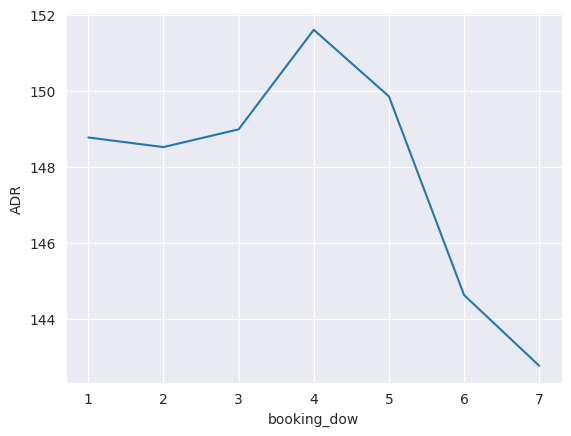

In [60]:
booking_dow = all_df.groupby('booking_dow').agg({'hotel_id':'nunique'
                  ,'ADR_USD':'mean'
                  ,'booking_date':'count'
                  ,'revenue':'sum'
                  }
                  ).reset_index()
booking_dow.columns=['booking_dow','hotel_amt','ADR','order_amt','revenue']
print(booking_dow)

sns.set_style('darkgrid')
sns.lineplot(data=booking_dow,x='booking_dow',y='ADR')

## By advance booking days

In [61]:
all_df.head()

,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,low,71.06
1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,medium,76.56
2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,1,2,6,A,high,153.88
3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,4,7,A,medium,126.60
4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,4,7,A,medium,115.08


    days_book_in_advance  hotel_amt         ADR  order_amt       revenue
0                      0        552  119.274947       5603  8.838099e+05
1                      1        557  126.904330       5666  1.101039e+06
2                      2        448  134.063562       2962  6.318975e+05
3                      3        409  139.460603       2430  5.537220e+05
4                      4        371  138.774256       2050  4.798747e+05
5                      5        352  148.217584       1763  4.255021e+05
6                      6        335  140.577476       1585  3.732786e+05
7                      7        312  150.129580       1420  3.653149e+05
8                      8        308  152.810496       1277  3.271942e+05
9                      9        298  156.190370       1210  3.169906e+05
10                    10        282  151.646822       1070  2.892328e+05
11                    11        270  156.743437       1016  2.832046e+05
12                    12        276  147.406670    

<Axes: xlabel='days_book_in_advance', ylabel='ADR'>

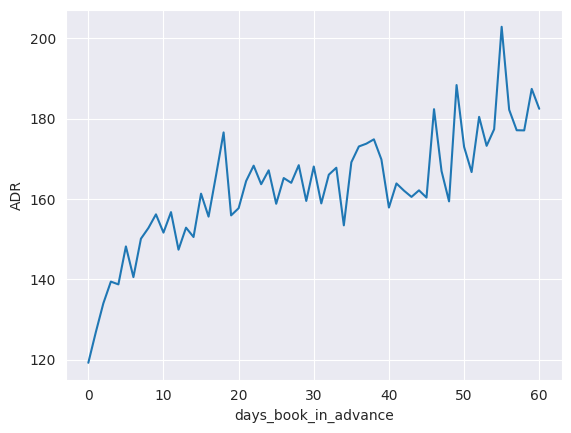

In [67]:
advance_booking_days = all_df[all_df['days_book_in_advance']!=-1].groupby('days_book_in_advance').agg({'hotel_id':'nunique'
                  ,'ADR_USD':'mean'
                  ,'booking_date':'count'
                  ,'revenue':'sum'
                  }
                  ).reset_index()
advance_booking_days.columns=['days_book_in_advance','hotel_amt','ADR','order_amt','revenue']
print(advance_booking_days)

sns.set_style('darkgrid')
sns.lineplot(data=advance_booking_days,x='days_book_in_advance',y='ADR')

    city  days_book_in_advance  hotel_amt         ADR  order_amt  \
0      A                     0        179   91.398522       2901   
1      A                     1        174   94.288202       2864   
2      A                     2        159   94.362392       1434   
3      A                     3        146  100.084396       1188   
4      A                     4        133  100.054842        959   
..   ...                   ...        ...         ...        ...   
300    E                    56         11  148.277500         12   
301    E                    57         10  105.875833         12   
302    E                    58          7  135.385000          8   
303    E                    59          8  188.707500          8   
304    E                    60          9  105.103889         12   

           revenue  
0    361113.890000  
1    425402.820000  
2    219561.360000  
3    198143.639524  
4    167404.426667  
..             ...  
300    2321.670000  
301    1672.660

<Axes: xlabel='days_book_in_advance', ylabel='ADR'>

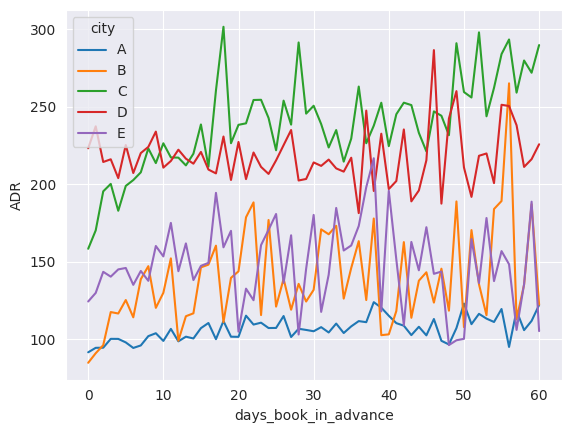

In [66]:
advance_booking_days = all_df[all_df['days_book_in_advance']!=-1].groupby(['city','days_book_in_advance']).agg({'hotel_id':'nunique'
                  ,'ADR_USD':'mean'
                  ,'booking_date':'count'
                  ,'revenue':'sum'
                  }
                  ).reset_index()
advance_booking_days.columns=['city','days_book_in_advance','hotel_amt','ADR','order_amt','revenue']
print(advance_booking_days)

sns.set_style('darkgrid')
sns.lineplot(data=advance_booking_days,x='days_book_in_advance',y='ADR',hue='city')

# assumptions

## different hotel type， different booking pattern

In [213]:
all_df.columns

Index(['order_id', 'ADR_USD', 'hotel_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date', 'days_book_in_advance',
       'weeks_book_in_advance', 'stay_nights', 'booking_dow', 'checkin_dow',
       'city', 'star_type', 'revenue'],
      dtype='object')

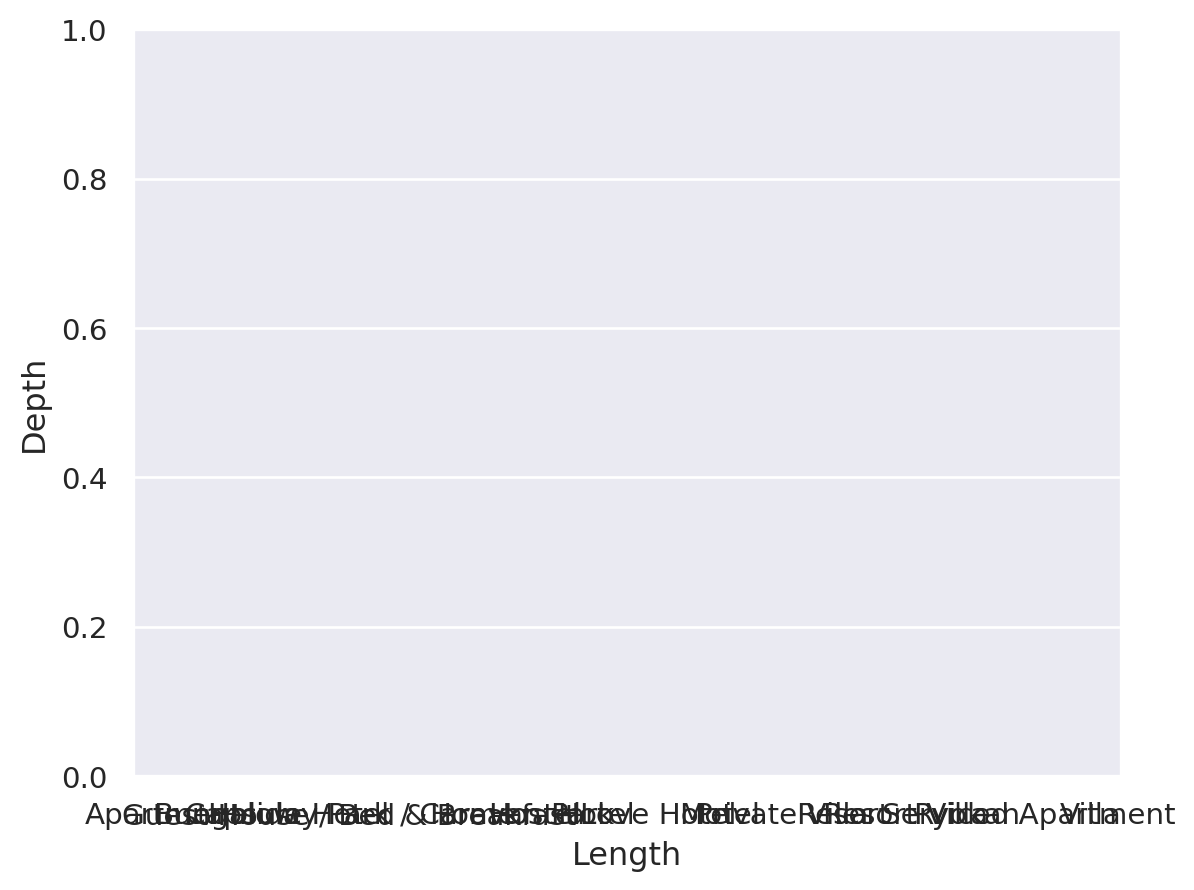

In [222]:
import seaborn.objects as so

# fig, ax2 = plt.subplots(figsize=(10,5))

# ax2.set_title('aaa',fontsize=16)
# ax2.set_xlabel('days_book_in_advance')
p = so.Plot(hotel_type_advance_days, x='accommodation_type_name' ,y="order_id_count_pct")
p.add(so.Bars(), so.Stack(),color='weeks_book_in_advance')
p.label(x="Length", y="Depth", color="")


In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

In [ ]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
}
subgroup_pct = {
    'group':['accommodation_type_name']
    ,'percentage':{'order_id':'count'}
}
hotel_type_advance_days = agg_func(all_df,groupby,agg,subgroup_pct)


sns.set_style('darkgrid')
sns.lineplot(data=hotel_type_advance_days,x='weeks_book_in_advance',y='order_id_count_pct',hue='accommodation_type_name')

# booking date cohort analysis

In [ ]:
a_cohort = a.groupby('days_book_in_advance').agg({'ADR_USD':'mean','#':'count'})
a_cohort_df = a_cohort.reset_index()
a_cohort_df.columns = ['days_book_in_advance','avg_ADR_USD','order_volume']
a_cohort_df

In [ ]:
# anomoly check
a[a['days_book_in_advance']==-1]

In [ ]:
a_cohort_df = a_cohort_df[a_cohort_df['days_book_in_advance']!=-1]
a_cohort_df['order_volume_pct']=a_cohort_df['order_volume']/(a_cohort_df['order_volume'].sum())
a_cohort_df

In [ ]:
sns.set_style('darkgrid')
sns.regplot(data=a_cohort_df, x="days_book_in_advance", y="avg_ADR_USD",  order = 3);


In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

In [ ]:
import numpy as np
cumsum = a_cohort_df['order_volume_pct'].cumsum()
n_components = np.argmax(cumsum >= 0.50) + 1
n_components

Most people book hotel when it's near the time they check in, over half customers book within 8 dyas ahead of checkin.  
As time approaching checkin date, price will decrease.  
  
So we can't use the 'price' reason to persuad customer to order soon.

# stay nights

In [ ]:
a_stay_nights = a.groupby(['stay_nights','days_book_in_advance']).agg({'#':'count','ADR_USD':'mean'})
a_stay_nights_df = a_stay_nights.reset_index()
a_stay_nights_df.columns = ['stay_nights','days_book_in_advance','order_volume','avg_ADR_USD']
a_stay_nights_df = a_stay_nights_df[a_stay_nights_df['days_book_in_advance']!=-1]
a_stay_nights_df.head()

In [ ]:
fig = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')

sns.lineplot(data=a_stay_nights_df, x='days_book_in_advance', y='avg_ADR_USD', hue='stay_nights')

plt.show()